#EDA ECOMMERCE CHURN
## NOMBRE: DIEGO ALONSO TELLO ALVA
## FUENTE : https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("upam22/ecommerce-customer-churn-data")

print("Path to dataset files:", path)

100%|██████████| 90.7k/90.7k [00:00<00:00, 29.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/upam22/ecommerce-customer-churn-data/versions/1


In [ ]:
data_df = pd.read_csv('/root/.cache/kagglehub/datasets/upam22/ecommerce-customer-churn-data/versions/1/ecom_data.csv')
data_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


#EDA

In [ ]:
data_df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


In [ ]:
data_df.dtypes.value_counts()

,count
int64,8
float64,7
object,5


In [ ]:
data_df.isnull().sum()

,0
customer_i_d,0
churn,0
tenure,0
preferred_login_device,0
city_tier,0
warehouse_to_home,0
preferred_payment_mode,0
gender,0
hour_spend_on_app,0
number_of_device_registered,0


#QUITAR NULOS

In [ ]:
data_df.dropna(inplace=True)

In [ ]:
data_df.shape

(3774, 20)

#CAMBIAR FORMATO TITULOS TABLA

In [ ]:
import re

def to_snake_case(name):
    # Insert an underscore before any uppercase letter that is not at the start of the string
    name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
    return name.lower()

data_df.columns = [to_snake_case(col) for col in data_df.columns]

In [ ]:
data_df

,customer_i_d,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


#CONTEOS Y PROPORCIONES

In [ ]:
df_clean = data_df.drop('customer_i_d', axis=1)

In [ ]:
df_clean.describe()

,churn,tenure,city_tier,warehouse_to_home,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
mean,0.167197,8.776895,1.707737,15.743773,2.981187,3.754107,3.056439,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.215156
std,0.373201,7.678508,0.936725,8.594330,0.722158,1.025233,1.389730,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.089821
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.250000
50%,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.000000
75%,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.000000
max,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.00000,16.000000,16.000000,46.000000,325.000000


In [ ]:
df_clean.describe(include=object)

,preferred_login_device,preferred_payment_mode,gender,prefered_order_cat,marital_status
count,3774,3774,3774,3774,3774
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,1936,1538,2271,1961,1982


##MEDIO DE PAGO PREFERIDO

<Axes: xlabel='preferred_payment_mode'>

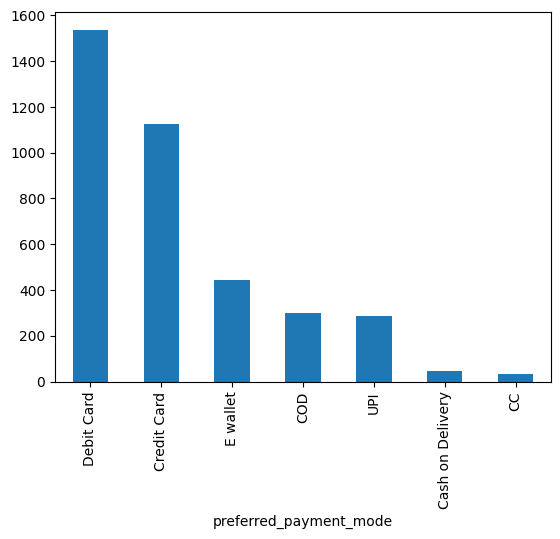

In [ ]:
(
    df_clean
    .preferred_payment_mode
    .value_counts()
    .plot(
        kind='bar'
    )
)

In [ ]:
df_clean['variable'] = ''
df_clean

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount,variable
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139,
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,
12,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155,
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151,
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186,
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179,


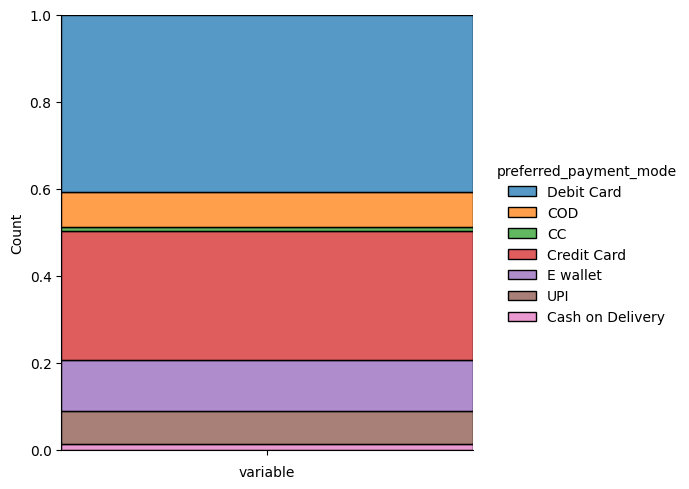

In [ ]:
(
    df_clean
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='variable',
                hue='preferred_payment_mode',
                multiple='fill'
            )
        )
    )
)

#CORRELACIONES

<Axes: >

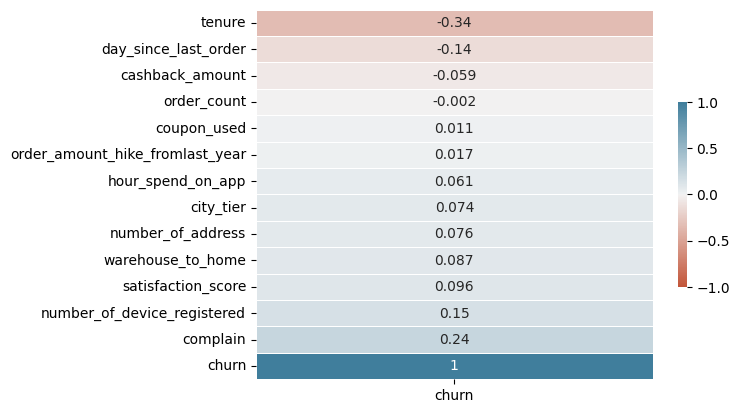

In [ ]:
corr_matrix = df_clean.corr(numeric_only=True)
corr_body_mass = corr_matrix[['churn']].sort_values(by='churn',ascending=True)
sns.heatmap(
    data=corr_body_mass,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    annot=True
)

#ANALISIS UNIVARIADO DE VARIABLE hour_spend_on_app

In [ ]:
variable = 'hour_spend_on_app'
data = df_clean[variable]

#MEDIDAS DE TENDENCIA CENTRAL

In [ ]:
mean_val = data.mean()
median_val = data.median()
mode_val = data.mode()[0]

print(f"📊 Medidas de tendencia central de {variable}")
print(f"Media (μ): {mean_val:.2f}")
print(f"Mediana: {median_val:.2f}")
print(f"Moda: {mode_val:.2f}")

📊 Medidas de tendencia central de hour_spend_on_app
Media (μ): 2.98
Mediana: 3.00
Moda: 3.00


#MEDIDAS DE DISPERSIÓN

In [ ]:
variance_val = data.var()
std_val = data.std()
range_val = data.max() - data.min()
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

print(f"\n📈 Medidas de dispersión de {variable}")
print(f"Varianza (σ²): {variance_val:.2f}")
print(f"Desviación estándar (σ): {std_val:.2f}")
print(f"Rango: {range_val:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")


📈 Medidas de dispersión de hour_spend_on_app
Varianza (σ²): 0.52
Desviación estándar (σ): 0.72
Rango: 5.00
Rango intercuartílico (IQR): 1.00


In [ ]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = data[(data < limite_inferior) | (data > limite_superior)]

print(f"\n⚠️ Detección de Outliers (Regla del IQR) para {variable}")
print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")
print(f"Número de outliers detectados: {len(outliers)}")


⚠️ Detección de Outliers (Regla del IQR) para hour_spend_on_app
Límite inferior: 0.50
Límite superior: 4.50
Número de outliers detectados: 4


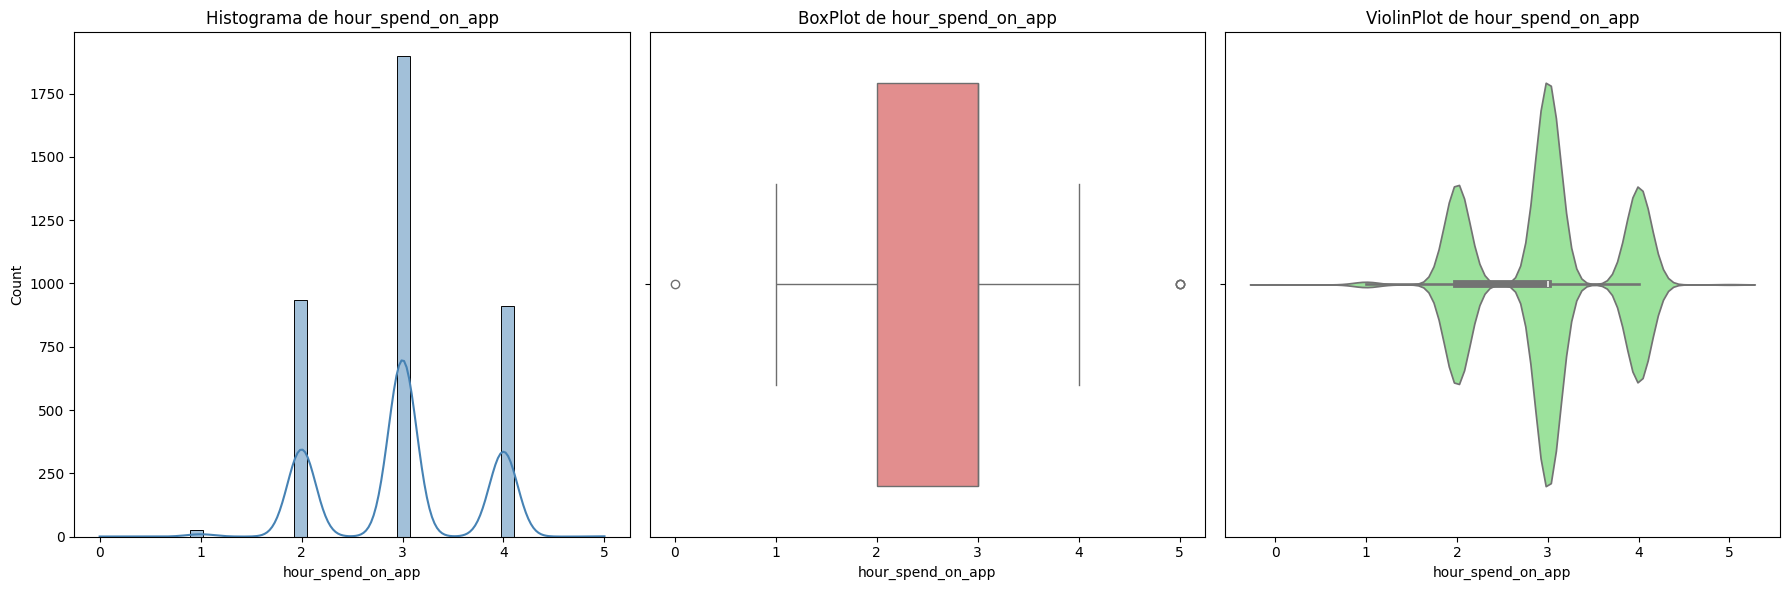

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(18,6))

#histograma
sns.histplot(data,kde=True,color='steelblue',ax=axes[0])
axes[0].set_title(f'Histograma de {variable}')

#boxplot
sns.boxplot(x=data,color='lightcoral',ax=axes[1])
axes[1].set_title(f'BoxPlot de {variable}')

#violinplot
sns.violinplot(x=data,color='lightgreen',ax=axes[2])
axes[2].set_title(f'ViolinPlot de {variable}')

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
skew_val = stats.skew(data)
kurt_val = stats.kurtosis(data)

print("\n📉 Forma de la distribución")
print(f"Asimetría (skewness): {skew_val:.3f}")
print(f"Curtosis (kurtosis): {kurt_val:.3f}")


📉 Forma de la distribución
Asimetría (skewness): -0.082
Curtosis (kurtosis): -0.696


In [ ]:
# Interpretación básica
if skew_val > 0.5:
    interpretacion = "Distribución sesgada a la derecha (cola larga a la derecha)"
elif skew_val < -0.5:
    interpretacion = "Distribución sesgada a la izquierda (cola larga a la izquierda)"
else:
    interpretacion = "Distribución aproximadamente simétrica"

print(f"🧩 Interpretación: {interpretacion}")

🧩 Interpretación: Distribución aproximadamente simétrica


In [ ]:
# Interpretación básica de kurtosis
if kurt_val > 0 :
    interpretacion = "leptocúrtica"
elif kurt_val < 0:
    interpretacion = "platicúrtica"
else:
    interpretacion = "normal"

print(f"🧩 Kurtosis : {interpretacion}")

🧩 Kurtosis : platicúrtica


# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [ ]:
df_clean.dtypes

,0
churn,int64
tenure,float64
preferred_login_device,object
city_tier,int64
warehouse_to_home,float64
preferred_payment_mode,object
gender,object
hour_spend_on_app,float64
number_of_device_registered,int64
prefered_order_cat,object


In [ ]:
categorical_cols = df_clean.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nUnique values for '{col}':")
    print(df_clean[col].unique())


Unique values for 'preferred_login_device':
['Mobile Phone' 'Phone' 'Computer']

Unique values for 'preferred_payment_mode':
['Debit Card' 'COD' 'CC' 'Credit Card' 'E wallet' 'UPI' 'Cash on Delivery']

Unique values for 'gender':
['Female' 'Male']

Unique values for 'prefered_order_cat':
['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Mobile' 'Others' 'Grocery']

Unique values for 'marital_status':
['Single' 'Divorced' 'Married']

Unique values for 'variable':
['']


In [ ]:
df_encoded = df_clean.drop('variable', axis=1)

In [ ]:
df_encoded['numeric_gender'] = df_encoded['gender'].map({'Female':0,'Male':1})
df_encoded

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount,numeric_gender
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160,0
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134,1
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139,0
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,154,1
12,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155,0
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151,1
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186,1
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179,1


In [ ]:
df_encoded = pd.get_dummies(df_encoded,columns=['preferred_login_device','preferred_payment_mode','prefered_order_cat','marital_status'],prefix='numeric',dtype=int)
df_encoded

,churn,tenure,city_tier,warehouse_to_home,gender,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,...,numeric_UPI,numeric_Fashion,numeric_Grocery,numeric_Laptop & Accessory,numeric_Mobile,numeric_Mobile Phone,numeric_Others,numeric_Divorced,numeric_Married,numeric_Single
0,1,4.0,3,6.0,Female,3.0,3,2,9,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0.0,3,15.0,Male,2.0,4,5,8,0,...,0,0,0,1,0,0,0,0,0,1
5,1,0.0,1,22.0,Female,3.0,5,5,2,1,...,0,0,0,0,0,1,0,0,0,1
11,1,11.0,1,6.0,Male,3.0,4,3,10,1,...,0,1,0,0,0,0,0,0,0,1
12,1,0.0,1,11.0,Male,2.0,3,3,2,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1.0,3,12.0,Female,2.0,5,3,2,0,...,1,0,0,0,0,1,0,0,0,1
5625,0,10.0,1,30.0,Male,3.0,2,1,6,0,...,0,0,0,1,0,0,0,0,1,0
5627,0,1.0,1,11.0,Male,3.0,2,4,3,1,...,0,0,0,1,0,0,0,0,1,0
5628,0,23.0,3,9.0,Male,4.0,5,4,4,0,...,0,0,0,1,0,0,0,0,1,0


<Axes: >

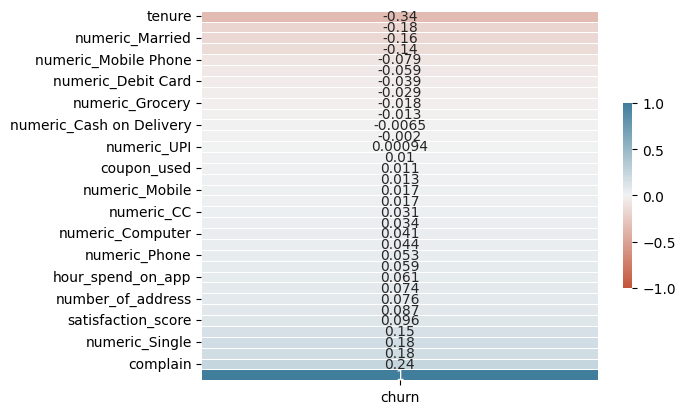

In [ ]:
corr_matrix = df_encoded.corr(numeric_only=True)
corr_body_mass = corr_matrix[['churn']].sort_values(by='churn',ascending=True)
sns.heatmap(
    data=corr_body_mass,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5},
    annot=True
)